# STAT207 Final Project - Predicting Fuel Type of Cars 


Ranya Belabbes, Roqaya Elmenshawy, Brandon Werba 

In [942]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt       
import seaborn as sns                  
sns.set()  
import numpy as np

## 1. Introduction

For our research project our first research goal will be to build a predictive model that will perform the best when predicting whether a car’s fuel type is petrol or diesel for new datasets. Ideally we would also like it to be reliably interpretive and descriptive about the nature of the relationship between the variables. Knowing if a car’s fuel is petrol or diesel is important for buyers to know because it will help them infer the costs of owning said car along with the environmental impacts that that car will have. According to Vavista “Diesel combustion makes a more complex mix of exhaust gases and chemicals, including harmful particulates. These microscopic soot particles can lead to breathing difficulties and health issues, particularly in cities”, which is something car buyers want to take into account when looking (Lower). One person who may find this model important is a car buyer who is trying to keep costs low, who may want to gauge the upkeep costs for their car and limit how much they would be spending on gas. According to Forbes, since 2005,  “...diesel has always traded at a premium” (Rapier). In comparison to petrol, diesel is more expensive to purchase and therefore may raise costs for car upkeep. They would prefer the true negative rate to be high - i.e. high accuracy making a diesel car as diesel. The main goal of this model is to keep costs such as gas low, hence the true negative rate being the goal and them being more interested in the negative rather than positive.

Our primary research goal is  to build a predictive model that will perform the best when predicting whether a car’s fuel type is petrol or diesel for new datasets. Our secondary goal is to make it reliable and interpretive as well as descriptive about the relationships in the dataset. To  do this we will be considering the 5 explanatory variables Year, selling price, present price, kms driven, and transmission. 

## 2. Dataset Discussion

The dataset was found on Kaggle by searching for datasets with csv formatting and looking through the options, specifically for those that met project requirements. The link for the dataset can be found here-  
https://www.kaggle.com/datasets/mahnazarjmand/cardata 
The dataset was downloaded on April 24th. The rows of this dataset look at unique car sales, providing information about the cars sold such as year, selling price, current price, mileage, and other car and sales details. Unfortunately, there was no provided information on how the data was collected or from where, but we can attempt to answer questions about the dataset. The dataset is definitely lacking some pieces of information that may be important to buyers, such as possible previous damages and other factors about the car itself, along with its history and how much it is being bought for compared to the ‘market price’ at the time of purchase. Knowing other factors such as if the car has been in a crash before can be an important factor, especially for people who are trying to save money on car upkeep, which would manifest in having to replace or constantly fix broken parts. 


The variable we intend to use as our response variable is fuel type which contains 3 values, CNG, Diesel, and Petrol. The 5 explanatory variables we intend to use in this model are Year, selling price, present price, kms driven, and transmission. Year states the year the car was made, selling price is the price it originally sold for, present price is the price the car would sell for when the data was collected, kms driven is the amount of kilometres the car has travelled, and transmission is the type of transmission the vehicle is which contains 2 values, automatic and manual. We chose these 5 explanatory variables because we thought it would be interesting to see how these variables relate to whether a car would need diesel or petrol 

In [943]:
df = pd.read_csv("cardata.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [944]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [945]:
df.shape[0]

301

301 rows in the dataframe before data cleaning 

## 3. Dataset Cleaning

In [946]:
df = df[["Year", "Selling_Price", "Present_Price", "Kms_Driven", "Fuel_Type", "Transmission"]]
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [947]:
df.dtypes

Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Transmission      object
dtype: object

In [948]:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Transmission     0
dtype: int64

The dataset does not have any implicit or explicit missing values 

In [949]:
np.unique(df["Fuel_Type"].values)

array(['CNG', 'Diesel', 'Petrol'], dtype=object)

In [950]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

The CNG value in fuel type only had 2 observations so since this can lead to overfitting we will drop all rows that have CNG fuel type. 

In [951]:
df["Transmission"].value_counts()

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64

In [952]:
df = df[df["Fuel_Type"] != "CNG"]
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission
0,2014,3.35,5.59,27000,Petrol,Manual
1,2013,4.75,9.54,43000,Diesel,Manual
2,2017,7.25,9.85,6900,Petrol,Manual
3,2011,2.85,4.15,5200,Petrol,Manual
4,2014,4.60,6.87,42450,Diesel,Manual
...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Manual
297,2015,4.00,5.90,60000,Petrol,Manual
298,2009,3.35,11.00,87934,Petrol,Manual
299,2017,11.50,12.50,9000,Diesel,Manual


In [953]:
df.shape[0]

299

After dropping the CNG values 2 rows were dropped so now there are 299 rows 

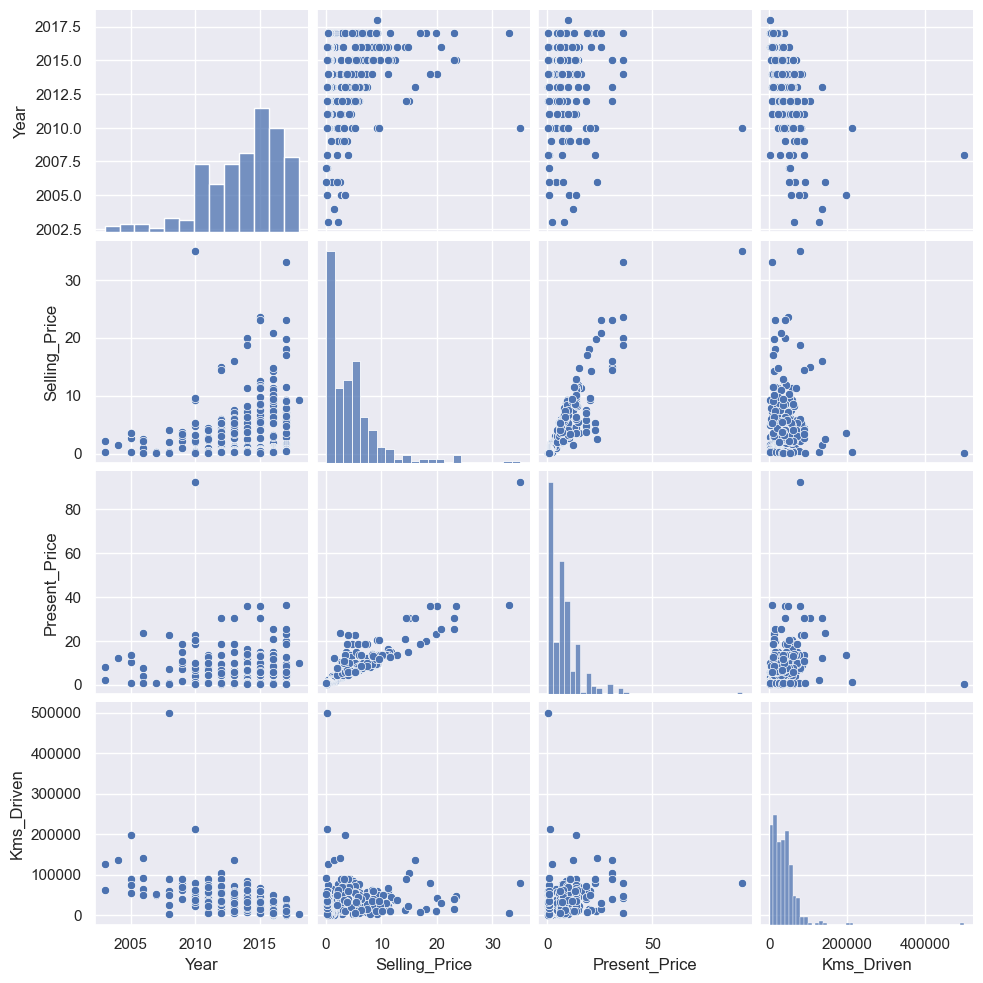

In [954]:
sns.pairplot(df)

In [955]:
numBins = {'1' : 0, '2' : 0, '3' : 0, '4' : 0, '5' : 0, '6' : 0, '7' : 0, '8' : 0, '9' : 0, '10+' : 0}
for i in df['Kms_Driven']:
    i = str(i)
    if (len(i) < 5):
        numBins['1'] += 1
    elif (len(i) > 5):
        numBins['10+'] += 1
    else:
        numBins[i[:1]] += 1
numBins


{'1': 99,
 '2': 42,
 '3': 41,
 '4': 46,
 '5': 28,
 '6': 16,
 '7': 11,
 '8': 6,
 '9': 2,
 '10+': 8}

This loop is meant to sort all the different milage values by tens of thousands. By looking at the first digit of each value with 5 digits, we can sort them by tens of thousands, along with any values with less than 5 digits (meaning they are just in the thousands) being filled into the 1 box (making it a 10000 miles or less bin), and values with more than 5 digits into the 10+ bin (making it a 100000 miles or more bin). By sorting these values we can see how the milage values are properly distributed as in the pairplot it is hard to see all unique values and where the values may cap around, so that we can properly drop outliers of the dataset such as a car with 500000 miles.

There we definitely some outliers and some pros to dropping them in would be possible better non-outlier performance and less skew of the data. Cons to dropping then would be that the model would be less representative of the entire dataset as well as potentially worse outlier performance. We will drop the outliers in hope of less skewed data. 

In [956]:
df = df[df['Kms_Driven']<80000]
df = df[df['Present_Price']<50]

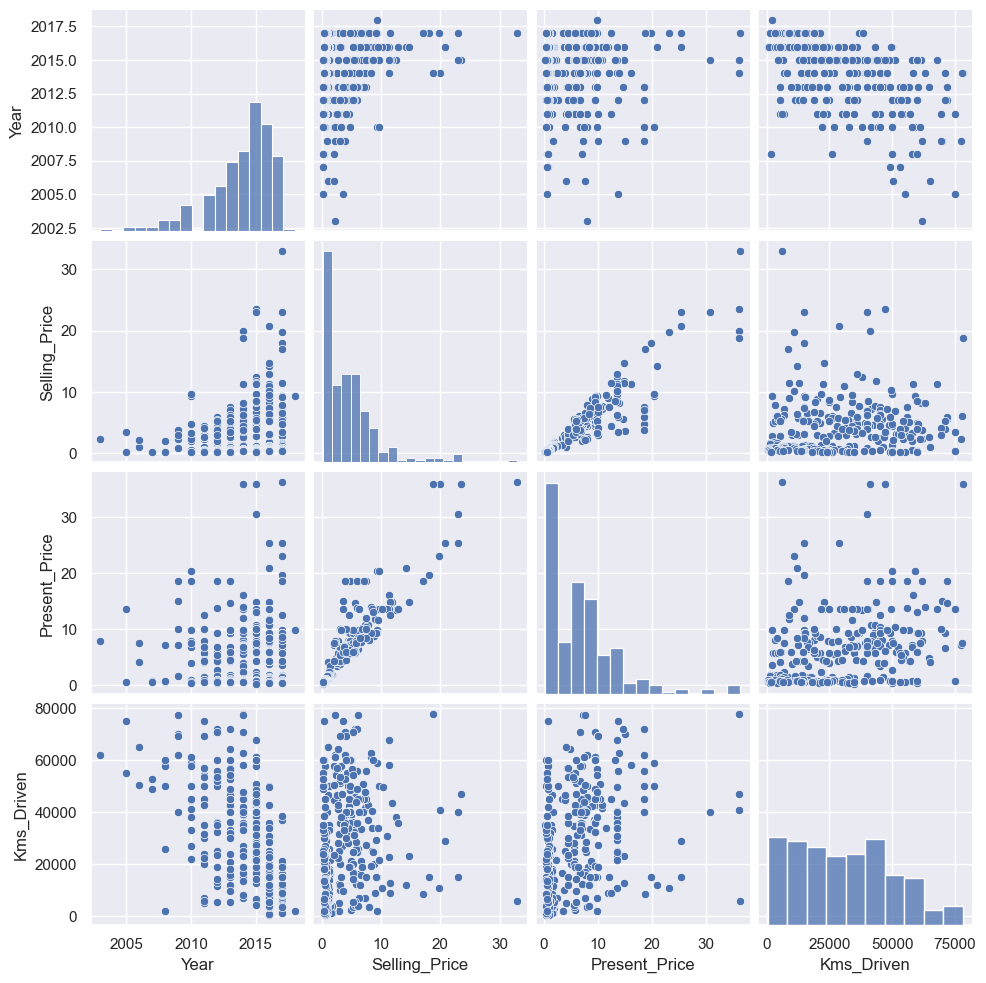

In [957]:
sns.pairplot(df)

In [958]:
final_len = df.shape[0]
final_len

282

We dropped 17 more rows due to the outliers 

We did not use any other data cleaning techniques. 

## 4. Preliminary Analysis

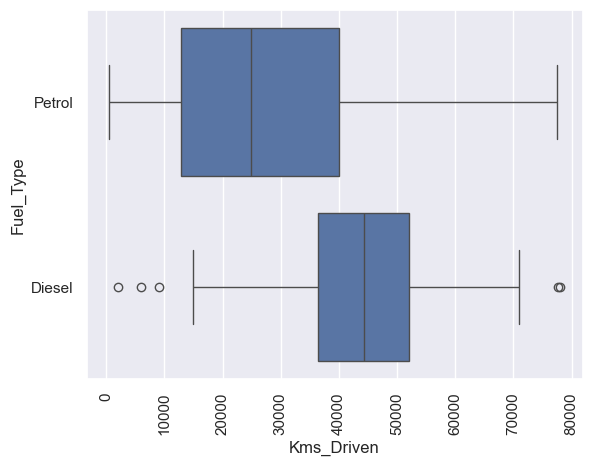

In [959]:
sns.boxplot(x='Kms_Driven',y='Fuel_Type', data=df)
plt.xticks(rotation = 90)
plt.show()

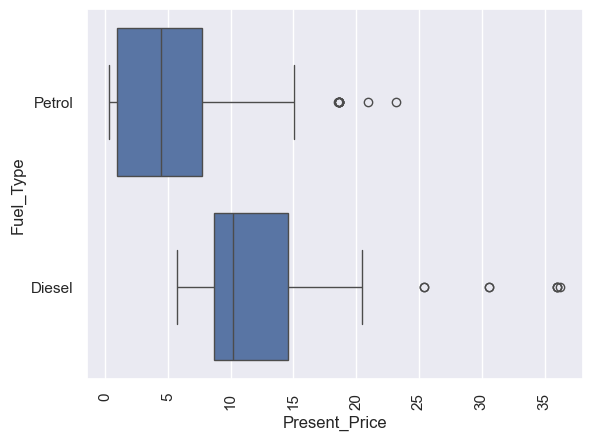

In [960]:
sns.boxplot(x='Present_Price',y='Fuel_Type', data=df)
plt.xticks(rotation = 90)
plt.show()

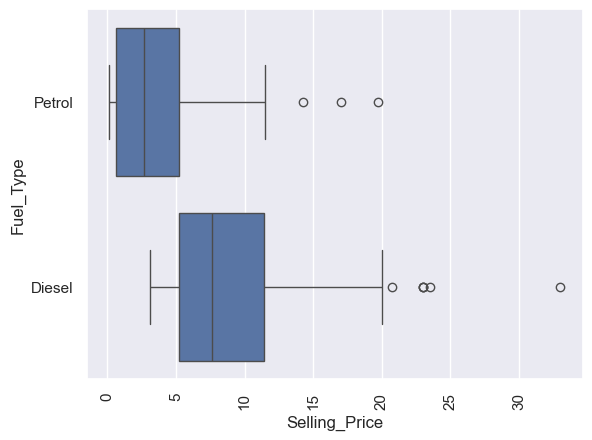

In [961]:
sns.boxplot(x='Selling_Price',y='Fuel_Type', data=df)
plt.xticks(rotation = 90)
plt.show()

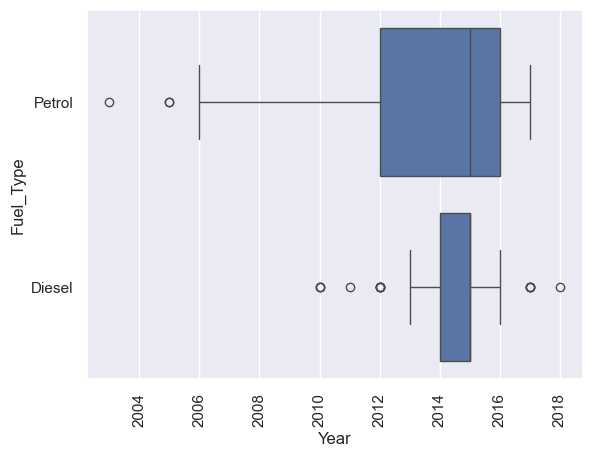

In [962]:
sns.boxplot(x='Year',y='Fuel_Type', data=df)
plt.xticks(rotation = 90)
plt.show()

In [963]:
df_category = pd.crosstab(df['Transmission'],df['Fuel_Type'], normalize='index')
df_category

Fuel_Type,Diesel,Petrol
Transmission,,
Automatic,0.28125,0.71875
Manual,0.18000,0.82000


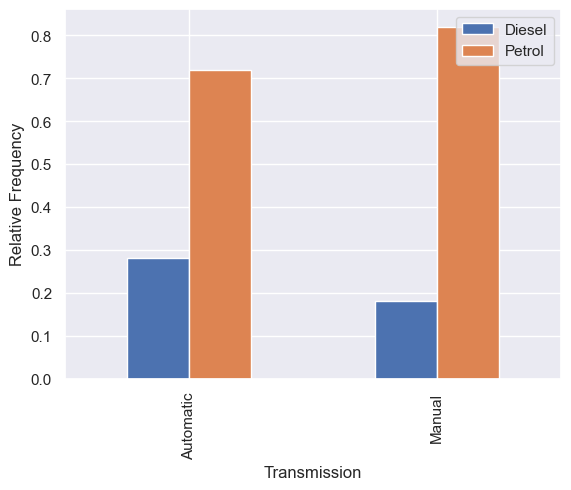

In [964]:
df_category.plot.bar()
plt.legend(loc='upper right')
plt.ylabel('Relative Frequency')
plt.show()

In [965]:
df_features = df[['Transmission', 'Present_Price', 'Selling_Price', 'Year', 'Kms_Driven']]
df_features

,Transmission,Present_Price,Selling_Price,Year,Kms_Driven
0,Manual,5.59,3.35,2014,27000
1,Manual,9.54,4.75,2013,43000
2,Manual,9.85,7.25,2017,6900
3,Manual,4.15,2.85,2011,5200
4,Manual,6.87,4.60,2014,42450
...,...,...,...,...,...
295,Manual,13.09,8.55,2015,60076
296,Manual,11.60,9.50,2016,33988
297,Manual,5.90,4.00,2015,60000
299,Manual,12.50,11.50,2017,9000


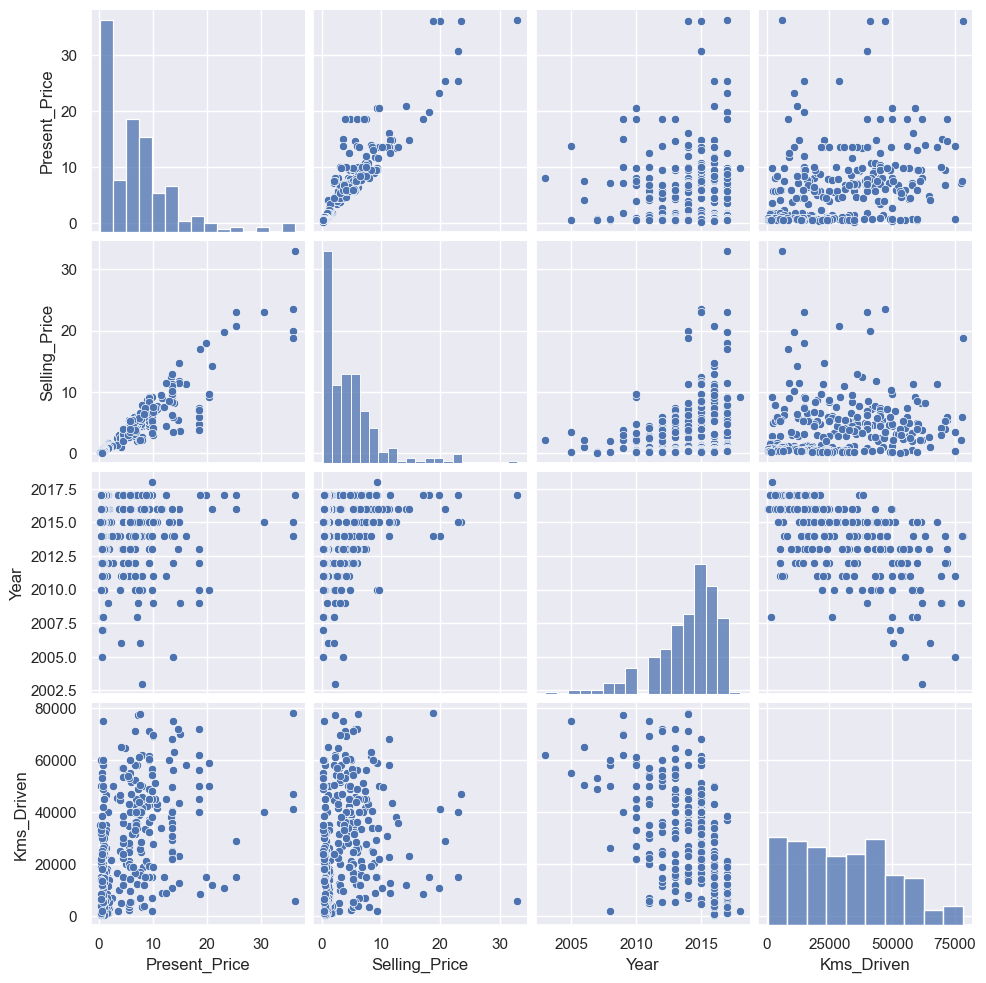

In [966]:
sns.pairplot(df_features)

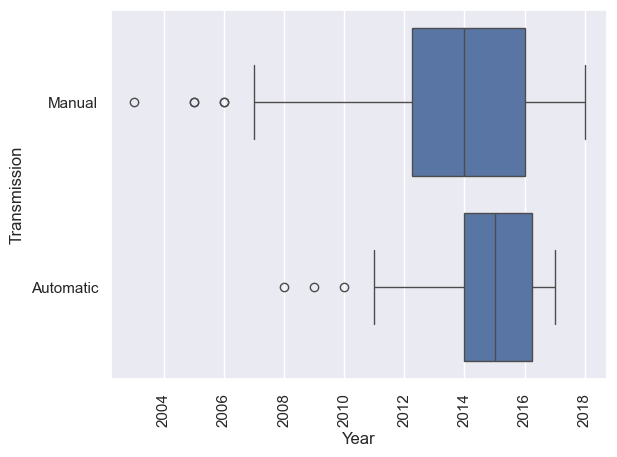

In [967]:
sns.boxplot(x='Year',y='Transmission', data=df)
plt.xticks(rotation = 90)
plt.show()

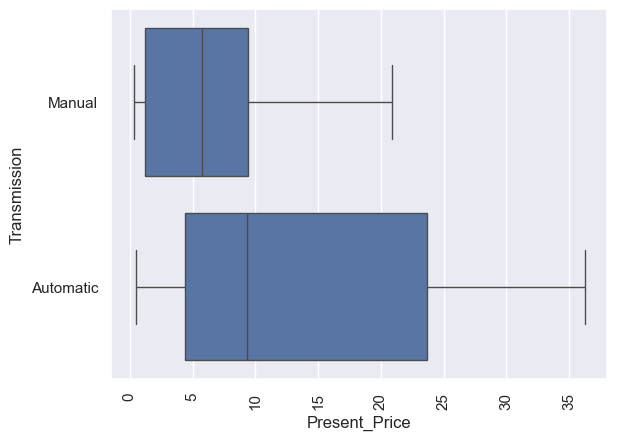

In [968]:
sns.boxplot(x='Present_Price',y='Transmission', data=df)
plt.xticks(rotation = 90)
plt.show()

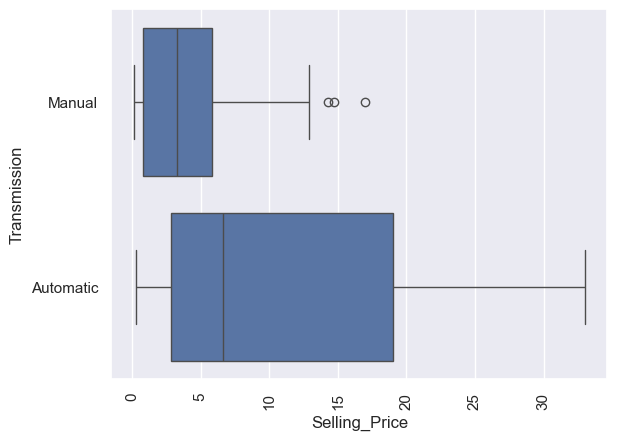

In [969]:
sns.boxplot(x='Selling_Price',y='Transmission', data=df)
plt.xticks(rotation = 90)
plt.show()

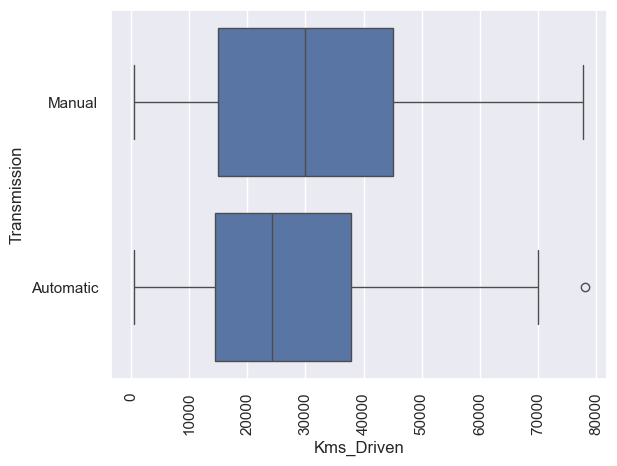

In [970]:
sns.boxplot(x='Kms_Driven',y='Transmission', data=df)
plt.xticks(rotation = 90)
plt.show()

Present Price and Selling Price have strong relationships with the response variable. Year has a weak relationship with the response variable.


In [971]:
df_features[['Present_Price', 'Selling_Price', 'Year', 'Kms_Driven']].corr()

,Present_Price,Selling_Price,Year,Kms_Driven
Present_Price,1.000000,0.920333,0.071383,0.299870
Selling_Price,0.920333,1.000000,0.288023,0.091572
Year,0.071383,0.288023,1.000000,-0.545883
Kms_Driven,0.299870,0.091572,-0.545883,1.000000


There is a pair of explanatory variables that have an association with each other like selling price and present price, this means the data could have an issue with multicollnearity. 

In [972]:
df['petrol_or_diesel'] = df['Fuel_Type'].replace({'Petrol':1, 'Diesel':0})
df

/var/folders/9q/n25028xj3392szd177gch1sc0000gn/T/ipykernel_52556/849366330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['petrol_or_diesel'] = df['Fuel_Type'].replace({'Petrol':1, 'Diesel':0})


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Transmission,petrol_or_diesel
0,2014,3.35,5.59,27000,Petrol,Manual,1
1,2013,4.75,9.54,43000,Diesel,Manual,0
2,2017,7.25,9.85,6900,Petrol,Manual,1
3,2011,2.85,4.15,5200,Petrol,Manual,1
4,2014,4.60,6.87,42450,Diesel,Manual,0
...,...,...,...,...,...,...,...
295,2015,8.55,13.09,60076,Diesel,Manual,0
296,2016,9.50,11.60,33988,Diesel,Manual,0
297,2015,4.00,5.90,60000,Petrol,Manual,1
299,2017,11.50,12.50,9000,Diesel,Manual,0


/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Users/ranyabelabbes/Library/Python/3.9/lib/python/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.

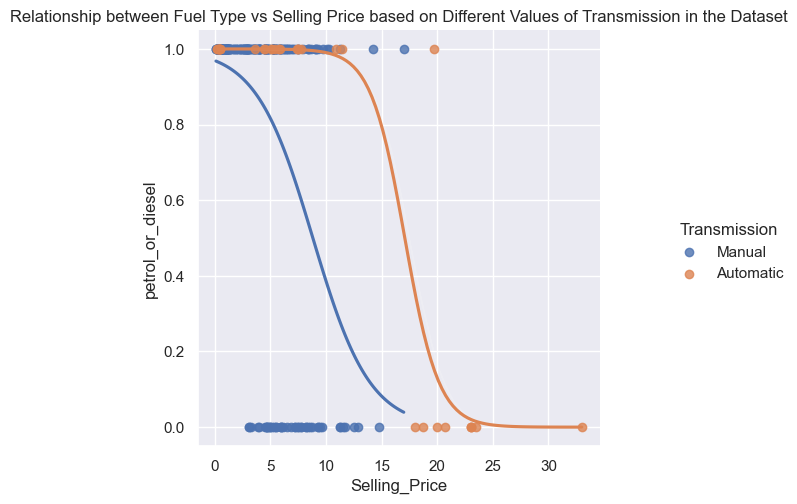

In [973]:
import warnings
from statsmodels.tools.sm_exceptions import PerfectSeparationWarning
warnings.filterwarnings('ignore', category=PerfectSeparationWarning)
sns.lmplot(x='Selling_Price',y='petrol_or_diesel', hue='Transmission', ci=False, data=df, logistic=True)
plt.title('Relationship between Fuel Type vs Selling Price based on Different Values of Transmission in the Dataset')
plt.show()

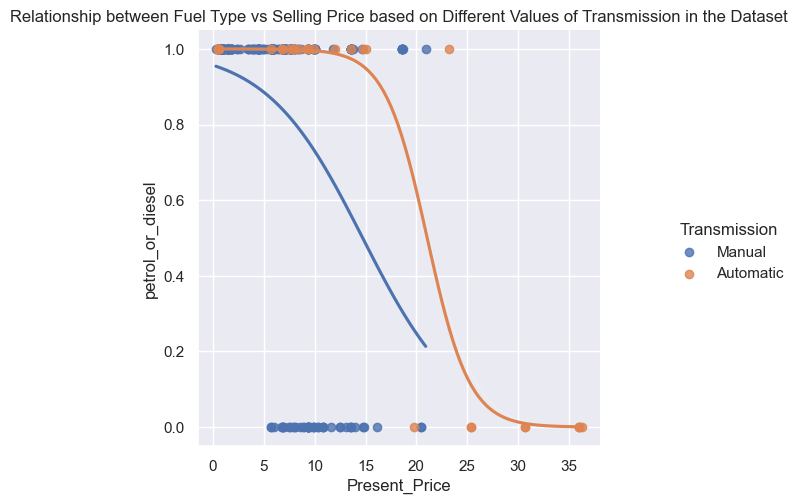

In [974]:
sns.lmplot(x='Present_Price',y='petrol_or_diesel', hue='Transmission', ci=False, data=df, logistic=True)
plt.title('Relationship between Fuel Type vs Selling Price based on Different Values of Transmission in the Dataset')
plt.show()

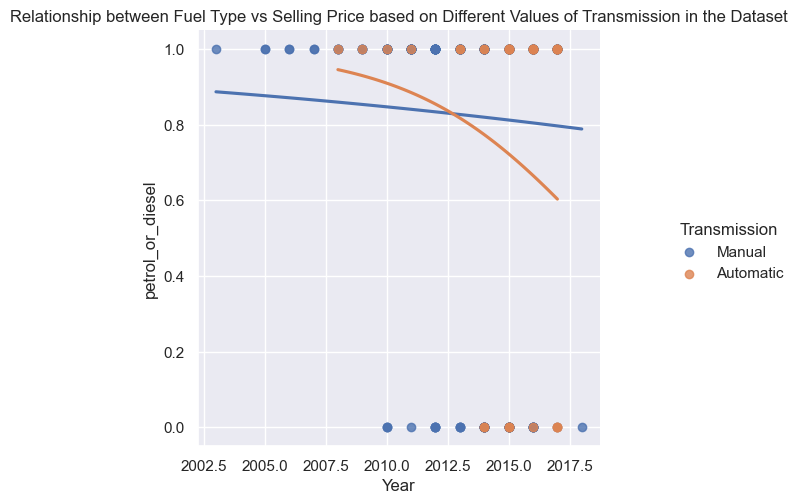

In [975]:
sns.lmplot(x='Year',y='petrol_or_diesel', hue='Transmission', ci=False, data=df, logistic=True)
plt.title('Relationship between Fuel Type vs Selling Price based on Different Values of Transmission in the Dataset')
plt.show()

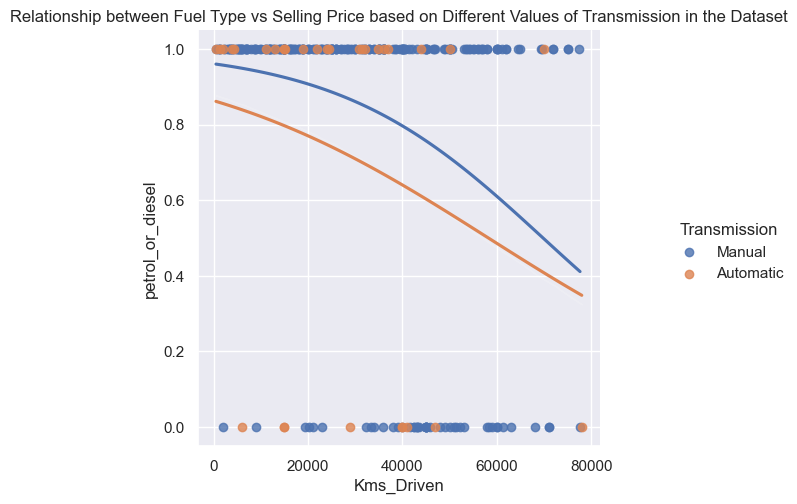

In [976]:
sns.lmplot(x='Kms_Driven',y='petrol_or_diesel', hue='Transmission', ci=False, data=df, logistic=True)
plt.title('Relationship between Fuel Type vs Selling Price based on Different Values of Transmission in the Dataset')
plt.show()

There is an interaction in all of these graphs because all of the slopes are different from one another. 

## 5. Model Data Preprocessing

In [977]:
df_features

,Transmission,Present_Price,Selling_Price,Year,Kms_Driven
0,Manual,5.59,3.35,2014,27000
1,Manual,9.54,4.75,2013,43000
2,Manual,9.85,7.25,2017,6900
3,Manual,4.15,2.85,2011,5200
4,Manual,6.87,4.60,2014,42450
...,...,...,...,...,...
295,Manual,13.09,8.55,2015,60076
296,Manual,11.60,9.50,2016,33988
297,Manual,5.90,4.00,2015,60000
299,Manual,12.50,11.50,2017,9000


In [978]:
df_target = df['petrol_or_diesel']
df_target

0      1
1      0
2      1
3      1
4      0
      ..
295    0
296    0
297    1
299    0
300    1
Name: petrol_or_diesel, Length: 282, dtype: int64

In [979]:
df_num_explanatory = df_features[['Present_Price', 'Selling_Price', 'Year', 'Kms_Driven']]
df_num_explanatory

,Present_Price,Selling_Price,Year,Kms_Driven
0,5.59,3.35,2014,27000
1,9.54,4.75,2013,43000
2,9.85,7.25,2017,6900
3,4.15,2.85,2011,5200
4,6.87,4.60,2014,42450
...,...,...,...,...
295,13.09,8.55,2015,60076
296,11.60,9.50,2016,33988
297,5.90,4.00,2015,60000
299,12.50,11.50,2017,9000


In [980]:
from sklearn.preprocessing import StandardScaler
scaler_training = StandardScaler()
scaled_expl_vars = scaler_training.fit_transform(df_num_explanatory)
df_num_explanatory = pd.DataFrame(scaled_expl_vars, columns=df_num_explanatory.columns)
df_num_explanatory 

,Present_Price,Selling_Price,Year,Kms_Driven
0,-0.202086,-0.252322,0.024821,-0.198672
1,0.392012,0.041767,-0.364047,0.623413
2,0.438638,0.566927,1.191426,-1.231416
3,-0.418669,-0.357354,-1.141783,-1.318763
4,-0.009568,0.010257,0.024821,0.595154
...,...,...,...,...
277,0.925949,0.840010,0.413690,1.500784
278,0.701846,1.039570,0.802558,0.160374
279,-0.155461,-0.115781,0.413690,1.496879
280,0.837210,1.459698,1.191426,-1.123518


In [981]:
df_categorical = df[['Transmission']]
df_categorical

,Transmission
0,Manual
1,Manual
2,Manual
3,Manual
4,Manual
...,...
295,Manual
296,Manual
297,Manual
299,Manual


In [982]:
df_cat_dum =pd.get_dummies(df_categorical, drop_first=True, dtype=int)
df_cat_dum

,Transmission_Manual
0,1
1,1
2,1
3,1
4,1
...,...
295,1
296,1
297,1
299,1


In [983]:
df_cat_dum.dtypes

Transmission_Manual    int64
dtype: object

In [984]:
df_num_explanatory.dtypes

Present_Price    float64
Selling_Price    float64
Year             float64
Kms_Driven       float64
dtype: object

In [985]:
df_num_explanatory = df_num_explanatory.reset_index(drop=True)
df_cat_dum = df_cat_dum.reset_index(drop=True)

df_features = pd.concat([df_num_explanatory, df_cat_dum], axis=1)
df_features

,Present_Price,Selling_Price,Year,Kms_Driven,Transmission_Manual
0,-0.202086,-0.252322,0.024821,-0.198672,1
1,0.392012,0.041767,-0.364047,0.623413,1
2,0.438638,0.566927,1.191426,-1.231416,1
3,-0.418669,-0.357354,-1.141783,-1.318763,1
4,-0.009568,0.010257,0.024821,0.595154,1
...,...,...,...,...,...
277,0.925949,0.840010,0.413690,1.500784,1
278,0.701846,1.039570,0.802558,0.160374,1
279,-0.155461,-0.115781,0.413690,1.496879,1
280,0.837210,1.459698,1.191426,-1.123518,1


## 6. Feature Selection with k-Fold Cross-Validation

## backwards elimination

In [986]:
from sklearn.linear_model import LogisticRegression
full_mod = LogisticRegression()

In [987]:
full_mod.fit(df_features,df_target)

LogisticRegression()

In [988]:
full_mod.predict_proba(df_features)[:,1]

array([0.94765065, 0.8232372 , 0.92455824, 0.99318334, 0.7867648 ,
       0.85884176, 0.88071014, 0.74904186, 0.7119579 , 0.50882905,
       0.98757749, 0.4504235 , 0.9681695 , 0.85114364, 0.63006635,
       0.46725694, 0.58044064, 0.46725694, 0.94702238, 0.94681204,
       0.97295321, 0.93549906, 0.85751568, 0.72662552, 0.98031347,
       0.65598087, 0.89482487, 0.93474728, 0.49001133, 0.82261932,
       0.84852221, 0.8090144 , 0.6730359 , 0.69042002, 0.67277716,
       0.97967434, 0.92371982, 0.9603979 , 0.84680061, 0.90043571,
       0.67822633, 0.90266758, 0.97614211, 0.64021097, 0.89405499,
       0.86882701, 0.80144805, 0.02037972, 0.29174133, 0.91761664,
       0.80074503, 0.89421554, 0.85118918, 0.11804326, 0.81190272,
       0.8054953 , 0.01598375, 0.01497658, 0.00296795, 0.7424017 ,
       0.24354305, 0.39405539, 0.48243354, 0.38432551, 0.8809972 ,
       0.51876262, 0.92134491, 0.8737234 , 0.37787218, 0.1733718 ,
       0.79587624, 0.06083327, 0.16704002, 0.6300349 , 0.82774

In [989]:
test_mod = LogisticRegression()

In [990]:
from sklearn.model_selection import KFold
cross_val = KFold(n_splits=5, shuffle=True, random_state=207)
cross_val

KFold(n_splits=5, random_state=207, shuffle=True)

In [991]:
from sklearn.model_selection import cross_val_score
test_fold_auc=cross_val_score(test_mod, df_features, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.91836735 0.91276596 0.95652174 0.91156463 0.8655303 ]
Mean Test Fold AUC: 0.9129499944793326
Std Test Fold AUC: 0.02890821645345622


In [992]:
df_features

,Present_Price,Selling_Price,Year,Kms_Driven,Transmission_Manual
0,-0.202086,-0.252322,0.024821,-0.198672,1
1,0.392012,0.041767,-0.364047,0.623413,1
2,0.438638,0.566927,1.191426,-1.231416,1
3,-0.418669,-0.357354,-1.141783,-1.318763,1
4,-0.009568,0.010257,0.024821,0.595154,1
...,...,...,...,...,...
277,0.925949,0.840010,0.413690,1.500784,1
278,0.701846,1.039570,0.802558,0.160374,1
279,-0.155461,-0.115781,0.413690,1.496879,1
280,0.837210,1.459698,1.191426,-1.123518,1


In [993]:
#drop Kms_Driven
new_df_features = df_features[['Present_Price', 'Selling_Price', 'Year', 'Transmission_Manual']]

In [994]:
from sklearn.model_selection import cross_val_score
test_fold_auc=cross_val_score(test_mod, new_df_features, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.8622449  0.88510638 0.9326087  0.9047619  0.82765152]
Mean Test Fold AUC: 0.8824746793007001
Std Test Fold AUC: 0.03586611007341439


In [995]:
#drop Year
new_df_features1 = df_features[['Present_Price', 'Selling_Price', 'Kms_Driven', 'Transmission_Manual']]

In [996]:
test_fold_auc=cross_val_score(test_mod, new_df_features1, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.90816327 0.90851064 0.95652174 0.90986395 0.875     ]
Mean Test Fold AUC: 0.9116119176625321
Std Test Fold AUC: 0.026007272530534434


In [997]:
#drop Selling_Price
new_df_features2 = df_features[['Present_Price', 'Year', 'Kms_Driven', 'Transmission_Manual']]

In [998]:
test_fold_auc=cross_val_score(test_mod, new_df_features2, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.88265306 0.88085106 0.92391304 0.8962585  0.85037879]
Mean Test Fold AUC: 0.8868108919625373
Std Test Fold AUC: 0.023857629072403755


In [999]:
#drop Present_Price
new_df_features3 = df_features[['Selling_Price', 'Year', 'Kms_Driven', 'Transmission_Manual']]

In [1000]:
test_fold_auc=cross_val_score(test_mod, new_df_features3, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.90306122 0.90638298 0.95652174 0.91326531 0.86742424]
Mean Test Fold AUC: 0.9093310981780652
Std Test Fold AUC: 0.02844862692364121


In [1001]:
# drop Transmission_Manual
new_df_features4 = df_features[['Selling_Price', 'Year', 'Kms_Driven', 'Present_Price']]

In [1002]:
test_fold_auc=cross_val_score(test_mod, new_df_features4, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.90561224 0.89361702 0.95217391 0.90816327 0.84848485]
Mean Test Fold AUC: 0.9016102586018008
Std Test Fold AUC: 0.03317180123149881


## drop year, continue algorithm

In [1003]:
#drop year, drop Present_Price
new_df_features11 = df_features[['Selling_Price', 'Kms_Driven', 'Transmission_Manual']]

In [1004]:
test_fold_auc=cross_val_score(test_mod, new_df_features11, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.9005102  0.90212766 0.95217391 0.90646259 0.875     ]
Mean Test Fold AUC: 0.9072548723467186
Std Test Fold AUC: 0.025022004664790994


In [1005]:
#drop year, drop Selling_Price
new_df_features12 = df_features[['Present_Price', 'Kms_Driven', 'Transmission_Manual']]

In [1006]:
test_fold_auc=cross_val_score(test_mod, new_df_features12, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.85459184 0.87659574 0.9173913  0.87414966 0.86174242]
Mean Test Fold AUC: 0.8768941939739481
Std Test Fold AUC: 0.021792699477210287


In [1007]:
#drop year, drop Kms_Driven
new_df_features13 = df_features[['Present_Price', 'Selling_Price', 'Transmission_Manual']]

In [1008]:
test_fold_auc=cross_val_score(test_mod, new_df_features13, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.86479592 0.86170213 0.92826087 0.90306122 0.81060606]
Mean Test Fold AUC: 0.8736852401375991
Std Test Fold AUC: 0.04010746987943608


In [1009]:
#drop year, drop Transmission_Manual
new_df_features14 = df_features[['Present_Price', 'Selling_Price', 'Kms_Driven']]

In [1010]:
test_fold_auc=cross_val_score(test_mod, new_df_features14, df_target, cv=cross_val, scoring='roc_auc')
print('Test Fold AUC Values:',test_fold_auc)
print('Mean Test Fold AUC:',test_fold_auc.mean())
print('Std Test Fold AUC:',test_fold_auc.std())

Test Fold AUC Values: [0.90306122 0.89361702 0.95       0.90986395 0.8655303 ]
Mean Test Fold AUC: 0.9044144988749852
Std Test Fold AUC: 0.02734275751539031


## 7. Best Model Discussion

In [1011]:
#drop year
new_df_features1 = df_features[['Present_Price', 'Selling_Price', 'Kms_Driven', 'Transmission_Manual']]
new_df_features1 = new_df_features1.reset_index(drop=True)
df_target = df_target.reset_index(drop=True)

In [1012]:
new_df = pd.concat([new_df_features1,df_target], axis=1)
new_df

,Present_Price,Selling_Price,Kms_Driven,Transmission_Manual,petrol_or_diesel
0,-0.202086,-0.252322,-0.198672,1,1
1,0.392012,0.041767,0.623413,1,0
2,0.438638,0.566927,-1.231416,1,1
3,-0.418669,-0.357354,-1.318763,1,1
4,-0.009568,0.010257,0.595154,1,0
...,...,...,...,...,...
277,0.925949,0.840010,1.500784,1,0
278,0.701846,1.039570,0.160374,1,0
279,-0.155461,-0.115781,1.496879,1,1
280,0.837210,1.459698,-1.123518,1,0


In [1013]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(new_df, test_size=0.2, random_state=207)

In [1014]:
#Training Features Matrix
X_train = df_train.drop(['petrol_or_diesel'],axis=1)
X_train.head()

,Present_Price,Selling_Price,Kms_Driven,Transmission_Manual
12,0.452174,0.619442,-0.815236,0
231,0.100227,0.146799,-0.712475,1
131,-0.924480,-0.840501,-0.815236,1
227,0.370956,0.136296,2.062063,1
142,-0.916509,-0.855206,-0.404193,1


In [1015]:
#Test Features Matrix
X_test = df_test.drop(['petrol_or_diesel'],axis=1)
X_test.head()

,Present_Price,Selling_Price,Kms_Driven,Transmission_Manual
1,0.392012,0.041767,0.623413,1
32,0.453678,0.304347,0.726174,1
171,-0.966142,-0.903520,0.058230,1
23,-0.379564,-0.346851,1.336521,1
210,0.370956,0.083780,1.496879,1


In [1016]:
#Training Target Array
y_train = df_train['petrol_or_diesel']
y_train.head()

12     1
231    1
131    1
227    0
142    1
Name: petrol_or_diesel, dtype: int64

In [1017]:
#Test Target Array
y_test = df_test['petrol_or_diesel']
y_test.head()

1      0
32     0
171    1
23     1
210    0
Name: petrol_or_diesel, dtype: int64

In [1018]:
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
log_reg_model = smf.logit(formula='petrol_or_diesel~Present_Price+Selling_Price+Kms_Driven+Transmission_Manual', data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.265006
         Iterations 8


In [1019]:
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       petrol_or_diesel   No. Observations:                  225
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 May 2025   Pseudo R-squ.:                  0.4768
Time:                        17:58:49   Log-Likelihood:                -59.626
converged:                       True   LL-Null:                       -113.96
Covariance Type:            nonrobust   LLR p-value:                 1.396e-22
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.3826      1.598      3.993      0.000       3.250       9.515
Present_Price           1.9793      0.717      2.760      0.006       0.574       3.385
Selling_Price          -4.2332      0.873     -4.850      0.000      -5.944      -2.523
Kms_Driven             -1.7556      0.358     -4.905      0.000      -2.457      -1.054
Transmission_Manual    -4.0603      1.500     -2.707      0.007      -7.000      -1.121
=======================================================================================
"""

log $\hat{(odds)}$ = log ($\hat{p}$ / 1 - $\hat{p}$) = 6.3826

1.9793	* Present_Price

-4.2332	* Selling_Price

-1.7556	* Kms_Driven

-4.0603 * Transmission_Manual



In [1020]:
X_train.corr()

,Present_Price,Selling_Price,Kms_Driven,Transmission_Manual
Present_Price,1.000000,0.923988,0.267940,-0.357502
Selling_Price,0.923988,1.000000,0.062292,-0.420975
Kms_Driven,0.267940,0.062292,1.000000,0.107470
Transmission_Manual,-0.357502,-0.420975,0.107470,1.000000


Yes, there is an issue with multicollinearity because we have at least one pair of explanatory variables that have a strong linear relationship. For example, Selling_Price and Present_Price have a strong linear relationship because they have a correlation of 0.977477 which is greater than 0.7. Because wwe have an issue with multicollinearity, we will not be able to interpret the magnitudes of the slopes as indicating how important the corresponding explanatory (or indicator) variable is when it comes to predicting your response variable in a logistic regression model.

In [1021]:
df_features.corr()

,Present_Price,Selling_Price,Year,Kms_Driven,Transmission_Manual
Present_Price,1.000000,0.920333,0.071383,0.299870,-0.364405
Selling_Price,0.920333,1.000000,0.288023,0.091572,-0.404761
Year,0.071383,0.288023,1.000000,-0.545883,-0.113225
Kms_Driven,0.299870,0.091572,-0.545883,1.000000,0.080467
Transmission_Manual,-0.364405,-0.404761,-0.113225,0.080467,1.000000


In [1022]:
df[['petrol_or_diesel','Year']].corr()

,petrol_or_diesel,Year
petrol_or_diesel,1.000000,-0.075162
Year,-0.075162,1.000000


Yes, Year was overfitting the model because when we dropped it, our AUC score increased the most, being the highest compared to the AUC of the full model. However, when we dropped variables alongside Year, our AUC decreased, indicating that only Year was overfitting. Year did not have a strong relationship with any of our explanatory variables. Year also had a very weak relationship with our response variable petrol_or_diesel.

In [1023]:
df_test['predictive_prob'] = log_reg_model.predict(df_test)
df_test[['predictive_prob','petrol_or_diesel']].head()

,predictive_prob,petrol_or_diesel
1,0.861394,0
32,0.658591,0
171,0.984211,1
23,0.666615,1
210,0.518478,0


In [1024]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true=df_test['petrol_or_diesel'], y_score=df_test['predictive_prob'])

In [1025]:
pd.DataFrame({'fpr':fprs, 'tpr':tprs})

,fpr,tpr
0,0.000,0.000000
1,0.000,0.020408
2,0.000,0.755102
3,0.125,0.755102
4,0.125,0.857143
5,0.250,0.857143
6,0.250,0.877551
7,0.375,0.877551
8,0.375,0.938776
9,0.500,0.938776


In [1026]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_test['petrol_or_diesel'],y_score=df_test['predictive_prob'])
auc

np.float64(0.9285714285714286)

In [1027]:
def plot_roc(fpr,tpr,auc,lw=2):
    plt.plot(fpr,tpr,color='darkorange',lw=lw, label='ROC curve (area='+str(round(auc,3))+')')
    plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show

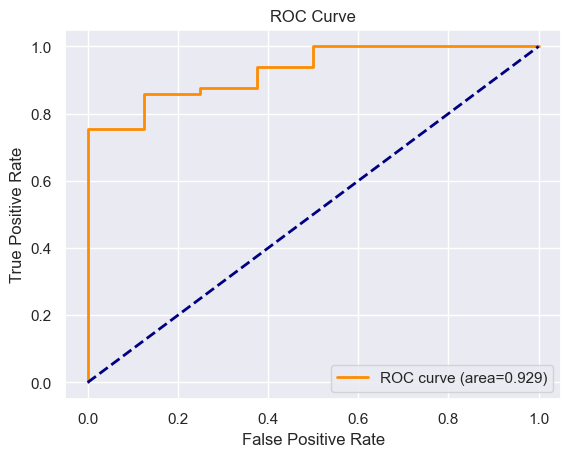

In [1028]:
plot_roc(fprs,tprs,auc)

The predictive probability has to be high enough & low enough to get classification results with perfect values. An ideal classifcation would have a tpr of 1 and fpr of 0 but that is not possible. We can get closer though. Given that the AUC score for this model is close to 1 (0.856) there does exist some predictive probability threshold which will get us very close to the ideal classification (fpr, tpr)=(0,1). We would need something way more closer to 1 like 0.95 to get an almost perfect FPR and TPR. Because our AUC score this model is close to 1 (0.856), based on our full model test data predictive probabilities, then our model would yield good predictions for new datasets.

In [1029]:
from sklearn.metrics import confusion_matrix
def fpr_tpr_thresh(petrol_or_diesel, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=petrol_or_diesel, y_pred=yhat).ravel()
    tpr = tp/(fn+tp)
    fpr = fp/(fp+tn)
    return pd.DataFrame({'threshold':[thresh], 'fpr':[fpr], 'tpr':[tpr]})

In [1030]:
fpr_tpr_thresh(df_test['petrol_or_diesel'],df_test['predictive_prob'],0.5)

,threshold,fpr,tpr
0,0.5,0.75,1.0


In [1031]:
import numpy as np
for thresh in np.arange(0,1.01,0.01):
    print(fpr_tpr_thresh(df_test['petrol_or_diesel'], df_test['predictive_prob'], thresh))

   threshold  fpr  tpr
0        0.0  1.0  1.0
   threshold  fpr  tpr
0       0.01  1.0  1.0
   threshold  fpr  tpr
0       0.02  1.0  1.0
   threshold  fpr  tpr
0       0.03  1.0  1.0
   threshold  fpr  tpr
0       0.04  1.0  1.0
   threshold    fpr  tpr
0       0.05  0.875  1.0
   threshold    fpr  tpr
0       0.06  0.875  1.0
   threshold    fpr  tpr
0       0.07  0.875  1.0
   threshold    fpr  tpr
0       0.08  0.875  1.0
   threshold    fpr  tpr
0       0.09  0.875  1.0
   threshold    fpr  tpr
0        0.1  0.875  1.0
   threshold    fpr  tpr
0       0.11  0.875  1.0
   threshold    fpr  tpr
0       0.12  0.875  1.0
   threshold    fpr  tpr
0       0.13  0.875  1.0
   threshold    fpr  tpr
0       0.14  0.875  1.0
   threshold    fpr  tpr
0       0.15  0.875  1.0
   threshold    fpr  tpr
0       0.16  0.875  1.0
   threshold    fpr  tpr
0       0.17  0.875  1.0
   threshold    fpr  tpr
0       0.18  0.875  1.0
   threshold    fpr  tpr
0       0.19  0.875  1.0
   threshold    fpr 

We would ideally want the FPR to be as low as possible because we want our TNR to be high (accurately predict our diesel cars to be diesel because we don't want cars that are diesel to be identified as petroleum because when the person buys the car and realizes it is diesel when filling up gas, they will spend more money which is not what we want since we want to minimize how much they are spending), and FPR and TNR are inversely related. It is not a big deal if our TPR is low, but if it is high, that would be good (it is not that big of a deal if our TPR is low--accurately predicting petroleum cars as petroleum--because if a petroleum car is identified as diesel, but the person buying the car later realizes it is a petroleum car when filling up gas, they would not spend much and would actually save money). Using the predictive probability threshold of 0.94, our FPR would be 0.25 and TPR would be 0.878788. This is our lowest FPR and highest TPR for that FPR.

## 8. Additional Analysis/Insight

<function matplotlib.pyplot.show(close=None, block=None)>

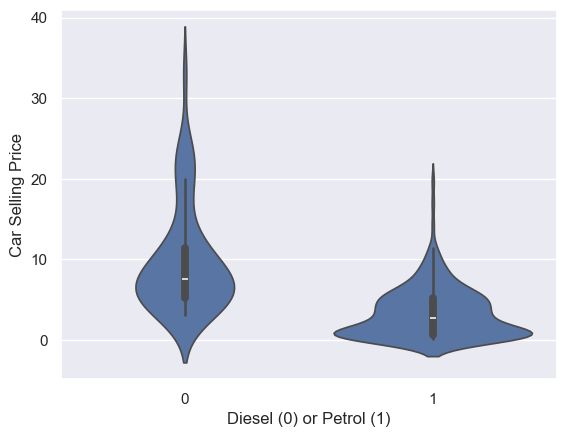

In [1032]:
sns.violinplot(x=df["petrol_or_diesel"], y = df["Selling_Price"], data = df)
plt.xlabel("Diesel (0) or Petrol (1)")
plt.ylabel("Car Selling Price")
plt.show

This graph helps advance our secondary research goal, showing a clear difference in Selling_Price based on fuel types, which can indicate that Selling_Price is a strong predictor fuel type while also showing that petrol cars are not only more affordable from a gas / upkeep sense, but also less expensive to purchase. 

## 9. Conclusion

We would recommend our best model to be used by a car buyer because it has a very high average test AUC score of .9116 which means it can distinguish the difference between our positive (petrol) values and our negative (diesel) values very well. We cannot say this model is the highest possible average test AUC any model could have since we didn't explore forewards selection or regularization with cross validation which could have resulted with a higher and better score. If we wanted to search for the model with the highest average test AUC score we would test all different types of feature selection to find the best one. There were also definetely shortcomings like the fact that there are many other types of factors that could have been included in the dataset and werent as well as the fact that our data has an issue with multicollinearity. For future work we think we could explore how much money a person could save by using this model and getting car that uses petrol instead of diesel as well as how it actually might effect the environment. 

## References

Lower, Alexandra. “Is petrol or diesel better for the environment? | Vavista Insurance.” Vavista Car Insurance, https://vavista.com/blog/is-petrol-or-diesel-better-for-the-environment/. Accessed 5 May 2025.

Rapier, Robert. “Why Diesel Usually Costs More Than Gasoline.” Forbes, 28 November 2023, https://www.forbes.com/sites/rrapier/2023/11/28/why-diesel-usually-costs-more-than-gasoline/. Accessed 5 May 2025.
